In [1]:
# 1D Linear regression

<span style="font-size: 30px;">
$$ 
\begin{align}
y = \beta_0 + \beta_1 x + \epsilon\\
y  = dependent \ variable  \\  
x  = independent \ variable   \\
\beta_0  = y \ intercept   \\   
\beta_1  = slope        \\  
\epsilon  = error \  term  
\end{align}        
$$
</span>


In [2]:
# nD linear regression or regression in a hyper space

<span style="font-size: 30px;">
$$ 
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \\
    \dots + \beta_n x_n + \epsilon
$$
</span>


In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import *

In [4]:
np.random.seed(1)
x = np.linspace(0, 10, 25)
# RV, y = 2x + 5 + some noise  , y=a+bx
a = 2
b = 5
y = a+b*x + sp.stats.norm.rvs(0,2,25)

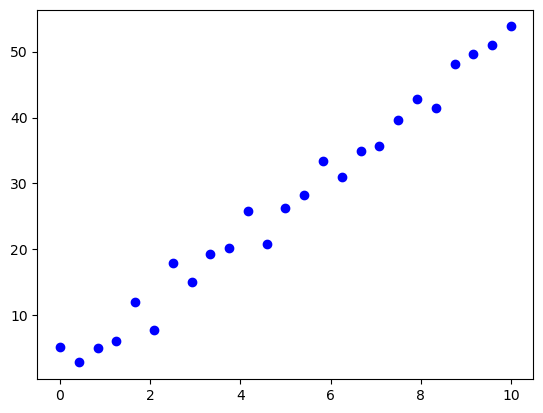

In [5]:
plt.plot(x,y,'bo')

In [6]:
# Now call the linear regression model in sklearn
# This model uses Y=X@W+B 
# X input random variable vector
# W weight vector
# B intercept

X=np.array([x**i for i in range(2)]).T
line=sk.linear_model.LinearRegression()

line.fit(X,y)

LinearRegression()

In [7]:
# build the test space
t=np.linspace(0,10,300)
T=np.array([t**i for i in range(2)]).T
yp=line.predict(T)    # predicted values, regression line

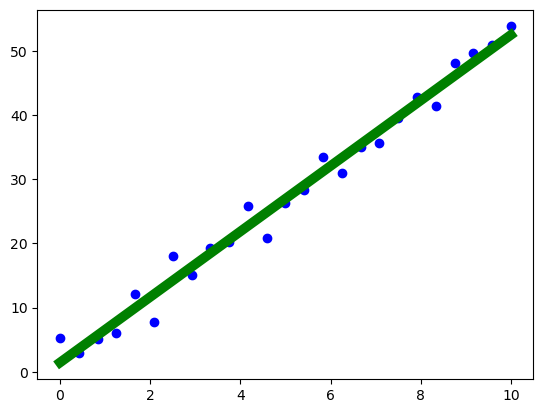

In [8]:
plt.plot(x,y,'bo')
plt.plot(t,yp,'g-',lw=7)

In [9]:
line.coef_

array([0.        , 5.10337404])

In [10]:
# Another simpler method is to build the polynomial
# bases with a built in function, poly
# then use a pipeline to connect the two functions. 

pipe=sk.pipeline.make_pipeline(
    sk.preprocessing.PolynomialFeatures(1),
    sk.linear_model.LinearRegression())

pipe.fit(x[:,np.newaxis],y)
    

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [11]:
yp2=pipe.predict(t.reshape(len(t),1))

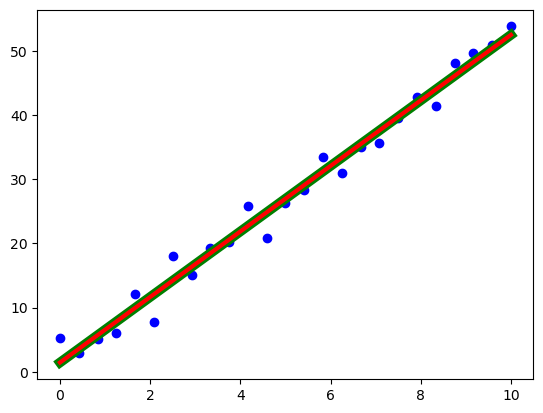

In [12]:
plt.plot(x,y,'bo')
plt.plot(t,yp,'g-',lw=7)
plt.plot(t,yp2,'r-',lw=3)

In [13]:
pipe.named_steps['linearregression'].coef_

array([0.        , 5.10337404])

In [14]:
# ===============================================
# ==============================================
# below is advanced, implement the linear regression by yourself!

In [15]:
# MMSE implementation of the linear regression above. 

In [16]:
mse=lambda x,y,a,b: ((a+b*x-y)**2).mean()

In [17]:
def mse_grad(x, y, a, b):
    N = len(x)
    yp= a+b*x
    e = yp-y  # error
    # b_grad = (-2/N) *(x * e).sum()  # slope gradient
    # a_grad = (-2/N) * e.sum()      # intercept gradient
    b_grad=(e*x).mean()
    a_grad=e.mean()
    return b_grad,a_grad

In [18]:
mse_grad(x,y,0,0)

(-180.94482787139125, -26.974540224973698)

In [19]:
mse(x,y,mse_grad(x,y,0,0)[0],mse_grad(x,y,0,0)[1])

126800.45331183154

In [45]:
def gradient_descent(x, y, lr=0.01, epochs=300):
    
    a = sp.stats.norm.rvs(0,1,1)
    b = np.random.randn()
    #a=-4
    #b=-6
    MSEs = []
    for epoch in range(epochs):
        b_g,a_g = mse_grad(x,y,a,b)
        a -= a_g*lr
        b -= b_g*lr 
        msey = mse(x,y,a,b)
        MSEs.append(msey)
    return a,b,MSEs

In [46]:
a,b, mses = gradient_descent(x, y, lr=0.01, epochs=300)

In [47]:
a,b,mse(x,y,a,b)

(array([0.74078543]), 5.209522172061732, 4.670580821186802)

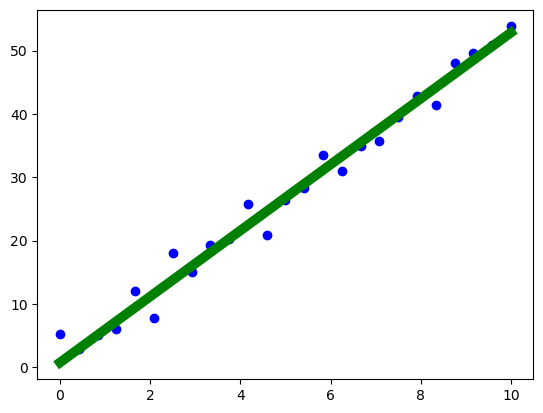

In [48]:
# Plot the best-fit line
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(t,a+b*t,'g-',lw=7)

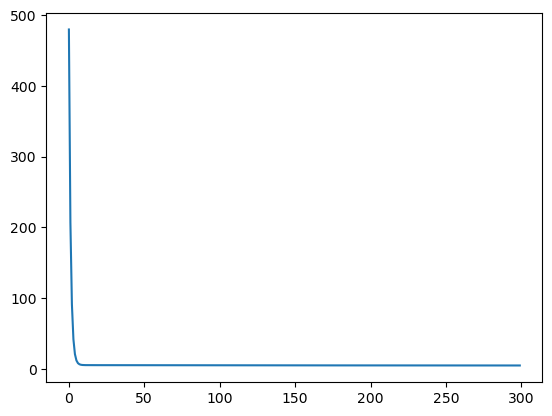

In [49]:
plt.plot(mses)